In [1]:
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import scipy 
from scipy.stats import pearsonr


In [2]:
bike = pd.read_csv("C:\\UpgradBikeSharing\\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 #### The DataFrame has 
The Dataset has 730 rows and 16 colums 
dteday column is an object 


### Data Cleaning 
##### check for the missing values  Values 

In [7]:
bike.isnull().sum()*100/len(bike)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Check for missing values in row

In [8]:
bike.isnull().sum(axis =1)*100/len(bike)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

There are no missing values in either the rows or columns 

##### Check for Duplicates 

In [9]:
bike_duplicate = bike 

In [10]:
bike_duplicate.drop_duplicates(inplace =True)

In [11]:
bike_duplicate.shape

(730, 16)

#####  There are no duplicates values in the data frame

check for Junk values after ingorning the instant column as it look like index colums

In [12]:
bike_junk = bike.iloc[:,1:16]
bike_junk.shape

(730, 15)

In [13]:
for i in bike_junk:
    print(bike_junk[i])
    print(bike_junk[i].value_counts(ascending=False), '\n\n\n')
 

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0      0
1      0
2      0
3      0
4      0
      ..
725    1
726    1
727    1
728    1
729    1
Name: yr, Length: 730, dtype: int64
0    365
1    365
Name: yr, dtype: int64 



0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: int64
1     6

##### there are not junk values in the dataframe

# EDA

In [14]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [16]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

#####  We can remove the redundant columns 
instant : its only a index value so can be removed 

dteday : We can remove this as we have a seperate column the mth and year columns 

casual & registered - These columns contains the count of bike booked under different category.

We have the totalcount column represented by cnt , we can ignore these columns 

In [17]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
bike_share = bike[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [19]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


 Creating a pair plot to understand the Numeric variables 

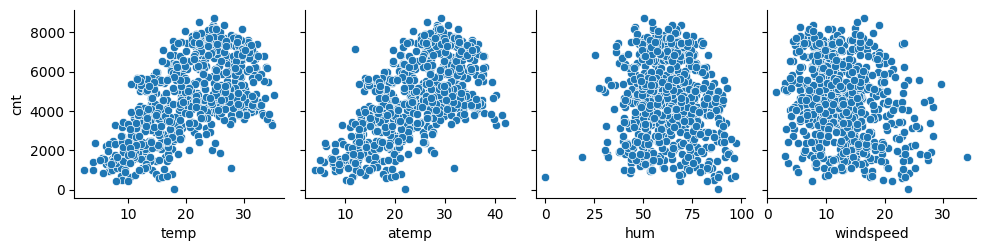

In [20]:
sns.pairplot(data = bike_share, x_vars=['temp','atemp','hum','windspeed'],y_vars ='cnt')
plt.show()

## Conclusion 
we see independent var temp and a temp is showing positve correlation with the target variable cnt

####  Visualise the catagorical variable using box plot


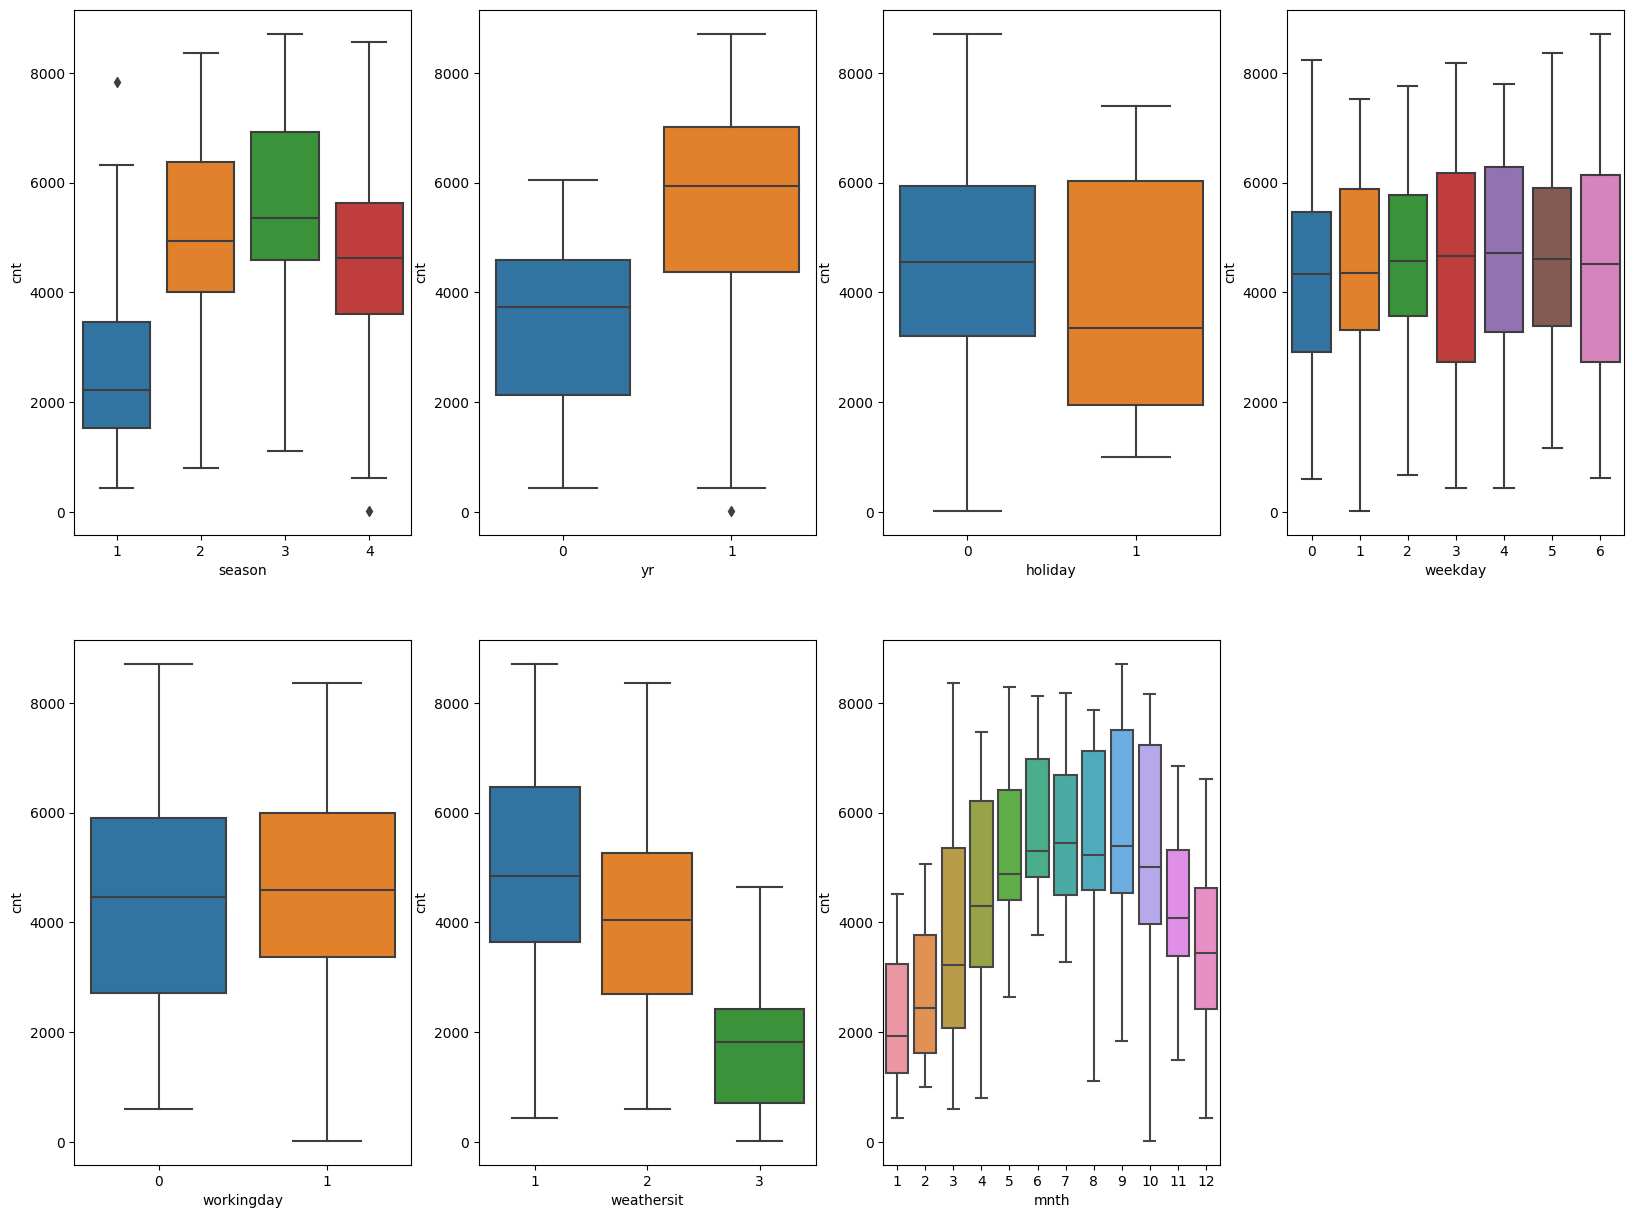

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x='season',y ='cnt', data = bike_share)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.show()

#### From the above graph we can make the follow obersvation 

1. Season 3 : Fall the medium is the highest , which show the demand is high during fall, less during spring(1)
2. Yr - 2019 has the higest demand 
3. Count is less during holidys
4. Demand during weekdays are almost similar
5. Demand is high when the Weathersit is clear, low during light shower
6. Demand is high during the month of Sept

Mapping the Catagorical variables to correct string variables 

In [22]:
bike_share['weathersit'] = bike_share['weathersit'].map({1:'Clear',2 :'Mist&Cloudy',3:'Snow&Rain',4:'Heavy Rain'})

In [23]:
bike_share.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
Clear          463
Mist&Cloudy    246
Snow&Rain       21
Name: weathersit, dtype: int64

In [24]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_share.season = bike_share.season.map(season_mapping)
bike_share.groupby(by='season').season.count().sort_values(ascending=False)


season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [25]:
weekday ={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"}
bike_share.weekday = bike_share.weekday.map(weekday)
bike_share.groupby(by='weekday').weekday.count().sort_values(ascending=False)

weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thrusday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [26]:
import calendar
bike_share.mnth = bike_share.mnth.apply(lambda x: calendar.month_abbr[x])

In [27]:
bike_share.groupby(by='mnth').mnth.count().sort_values(ascending=False)

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [28]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy variable for Catagorical variables 'season',mnth','weekday','weathersit'

In [29]:
dummy_var = bike_share[['season','mnth','weekday','weathersit']]

In [30]:
dummy_var = pd.get_dummies(dummy_var,drop_first=True)

In [31]:
dummy_var

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist&Cloudy,weathersit_Snow&Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


###### Add the Dummy Var to the data set bike share

In [32]:
bike_share = pd.concat([dummy_var,bike_share],axis=1)

In [33]:
bike_share.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
bike_share.shape

(730, 34)

In [35]:
bike_share.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Mist&Cloudy',
       'weathersit_Snow&Rain', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [36]:
# Drop the original column 
bike_share.drop('season',axis=1,inplace=True)
bike_share.drop('mnth',axis=1,inplace=True)
bike_share.drop('weekday',axis=1,inplace=True)
bike_share.drop('weathersit',axis=1,inplace=True)
bike_share.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_spring           730 non-null    uint8  
 1   season_summer           730 non-null    uint8  
 2   season_winter           730 non-null    uint8  
 3   mnth_Aug                730 non-null    uint8  
 4   mnth_Dec                730 non-null    uint8  
 5   mnth_Feb                730 non-null    uint8  
 6   mnth_Jan                730 non-null    uint8  
 7   mnth_Jul                730 non-null    uint8  
 8   mnth_Jun                730 non-null    uint8  
 9   mnth_Mar                730 non-null    uint8  
 10  mnth_May                730 non-null    uint8  
 11  mnth_Nov                730 non-null    uint8  
 12  mnth_Oct                730 non-null    uint8  
 13  mnth_Sep                730 non-null    uint8  
 14  weekday_Monday          730 non-null    ui

## Splitting the Data to train and test sets

In [38]:
# Spilting the dataset 70:30 
bike_train,bike_test = train_test_split(bike_share, train_size=0.7,random_state=100)


In [39]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [40]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_spring           510 non-null    uint8  
 1   season_summer           510 non-null    uint8  
 2   season_winter           510 non-null    uint8  
 3   mnth_Aug                510 non-null    uint8  
 4   mnth_Dec                510 non-null    uint8  
 5   mnth_Feb                510 non-null    uint8  
 6   mnth_Jan                510 non-null    uint8  
 7   mnth_Jul                510 non-null    uint8  
 8   mnth_Jun                510 non-null    uint8  
 9   mnth_Mar                510 non-null    uint8  
 10  mnth_May                510 non-null    uint8  
 11  mnth_Nov                510 non-null    uint8  
 12  mnth_Oct                510 non-null    uint8  
 13  mnth_Sep                510 non-null    uint8  
 14  weekday_Monday          510 non-null    

#### Rescaling of training set Feature

In [41]:
#Using the MinMax scaling
# Instantiate the scaler object
scaler = MinMaxScaler()

In [42]:
#create a numeric list as we want to scale only the numeric variable not the dummy variables created now
var_list =['temp','atemp','hum','windspeed','cnt']

In [43]:
bike_train[var_list]= scaler.fit_transform(bike_train[var_list])
bike_train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [44]:
bike_train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.345098,0.029412,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.475867,0.169124,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking Correlation Coefficient

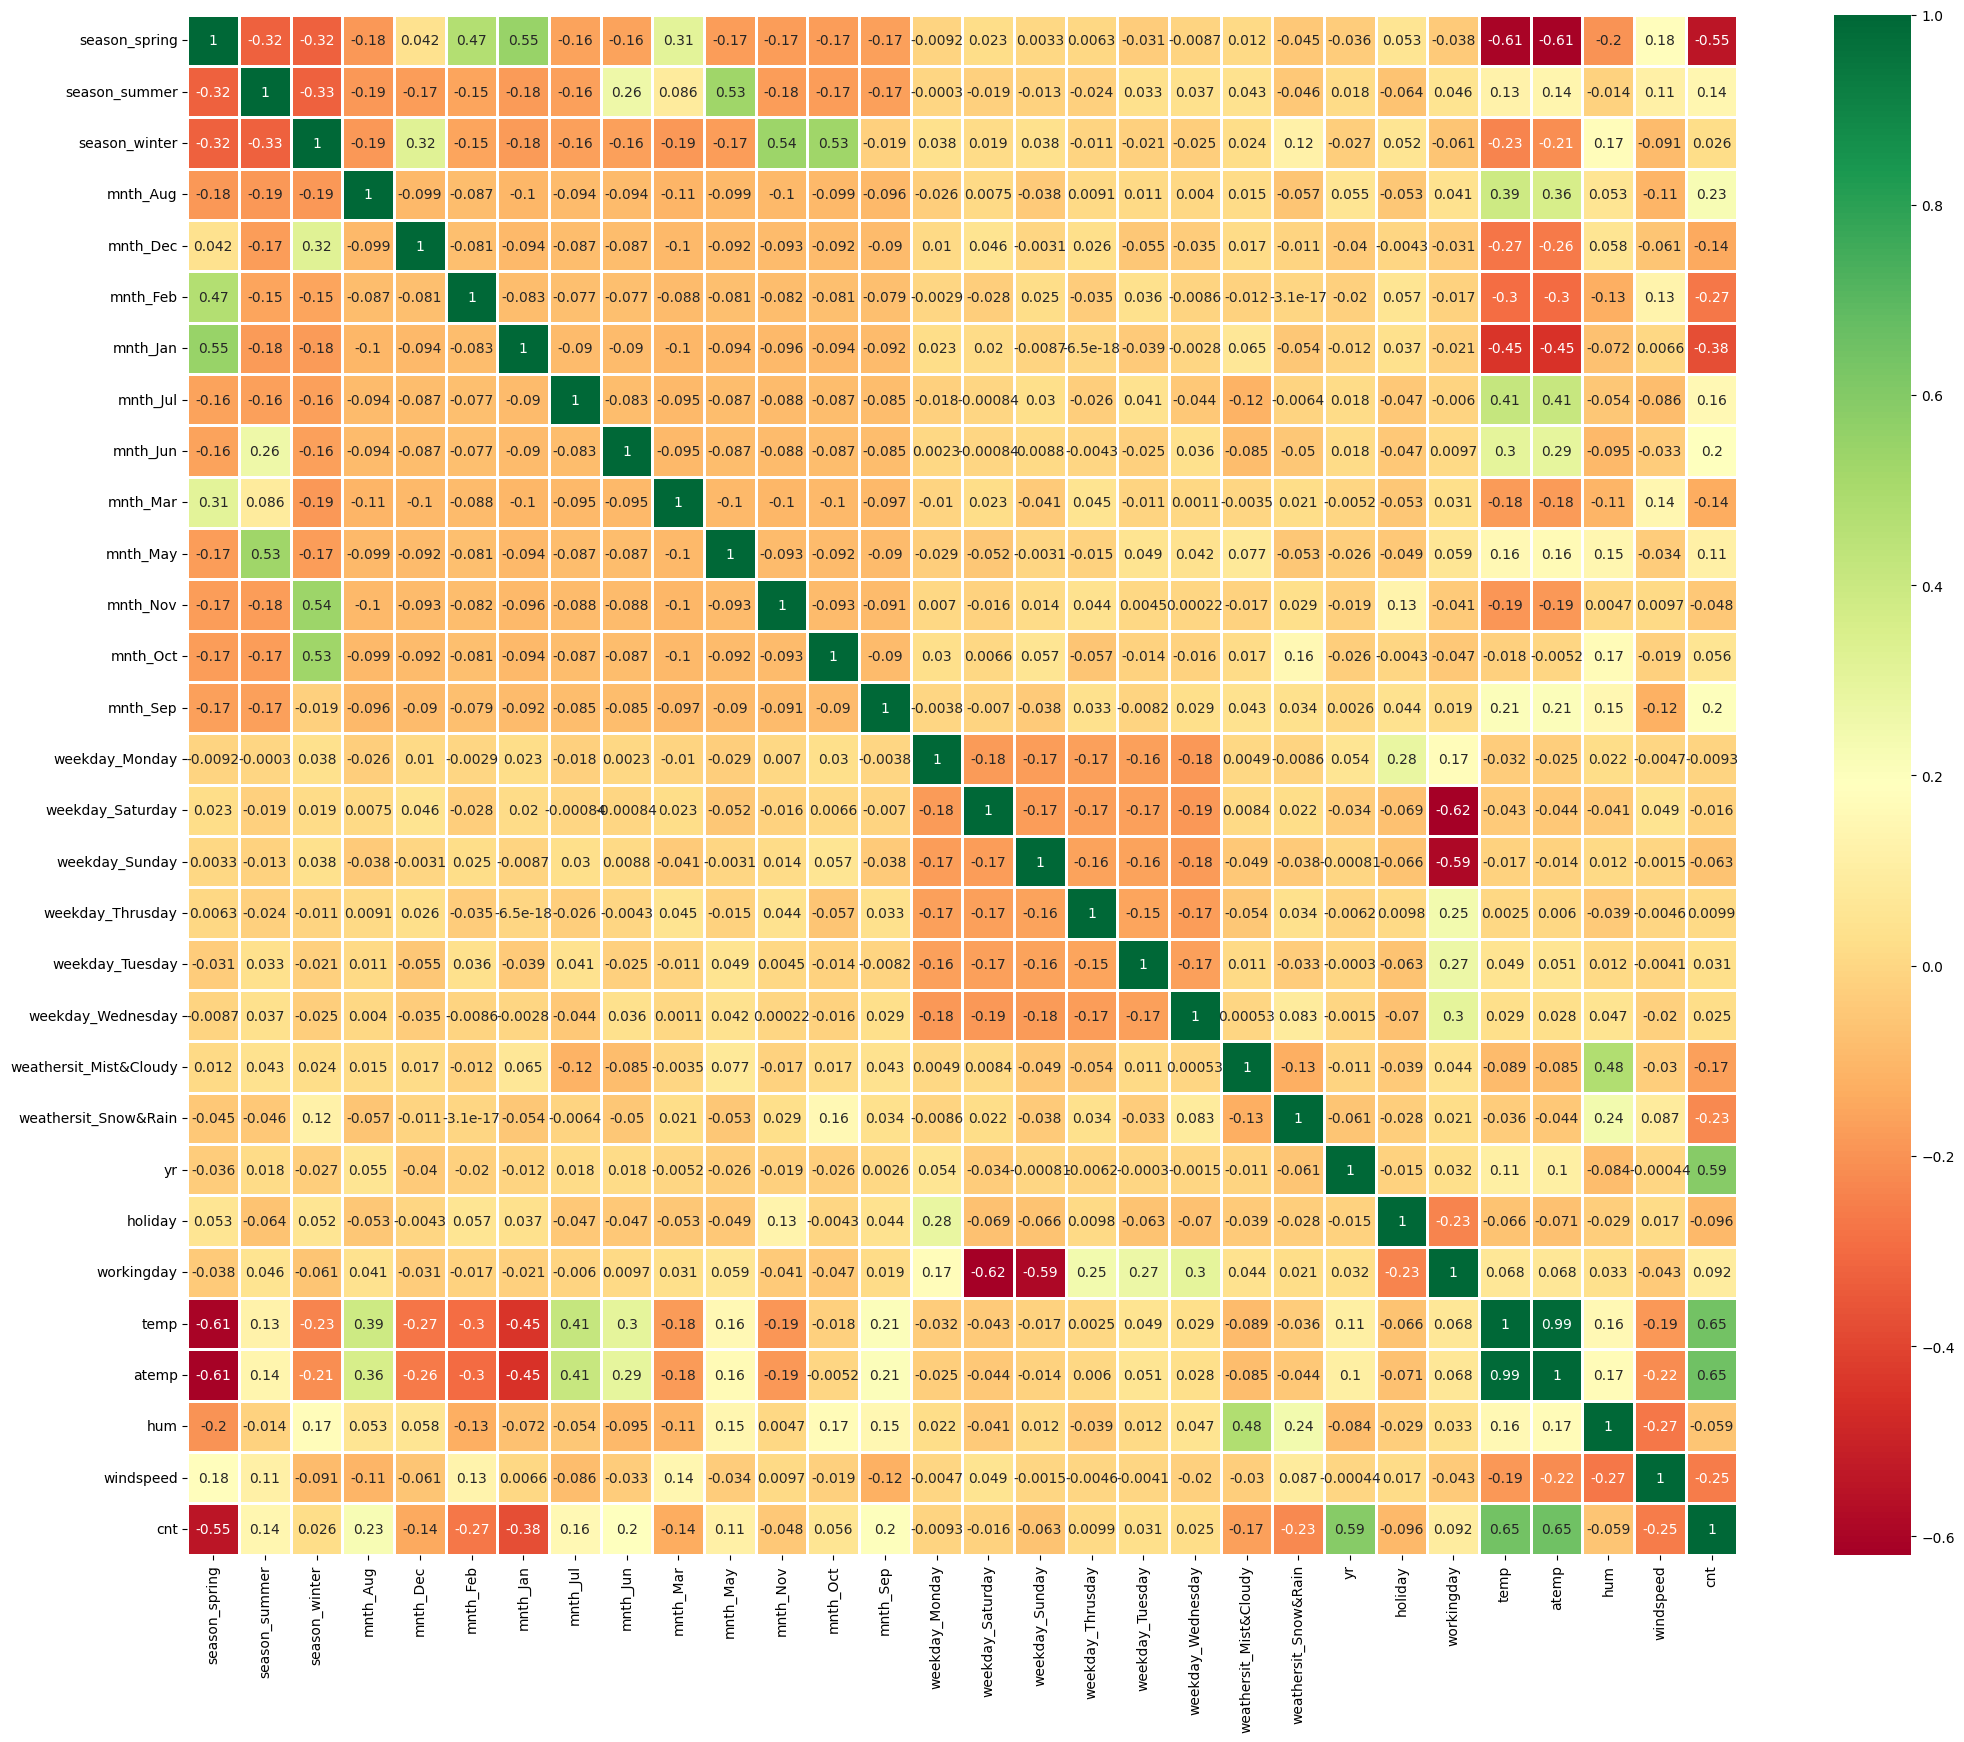

In [45]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

There is multi-colinearity between the variables. We need to consider the factors when developing the model.

temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables

workingday variable has high negative correlation with Sat & Sun (where workingday =0)

Spring is negatively correlated with cnt

temp, atemp and yr has strong correlation with cnt

weather and humidity has correlation

various months and corresponding weather has correlation

## Building the Linear Model

### Dividing in to X and Y for model building 

In [46]:
Y_train = bike_train.pop("cnt")
X_train = bike_train

##### Using the RFE approach for feature selection

In [47]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

We have 30 variables to run our prediction . Analysising all 30 will be difficult , so starting with taking only 15 variables 


In [48]:
rfe = RFE(estimator=lm, n_features_to_select=15)

In [49]:
rfe = rfe.fit(X_train,Y_train)

In [50]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Mist&Cloudy', True, 1),
 ('weathersit_Snow&Rain', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Model Building Process using StatsModel

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday', 'weathersit_Mist&Cloudy',
       'weathersit_Snow&Rain', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [53]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe= X_train[col]


In [54]:
# Adding a Constant variable
X_train_rfe = sm.add_constant(X_train_rfe)


In [55]:
lm= sm.OLS(Y_train,X_train_rfe).fit() # Linear Model

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 13 May 2023   Prob (F-statistic):          4.22e-191
Time:                        10:06:53   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

####  Checking VIF

In [57]:
#Calculating the VIF for the new model 
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif["VIF"]= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
0,const,84.60
1,season_spring,5.08
13,temp,3.89
3,season_winter,3.59
2,season_summer,2.65
14,hum,1.91
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
8,weathersit_Mist&Cloudy,1.57


In [58]:
# dropping the Cont col as VIF>5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [59]:
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif["VIF"]= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_spring,4.53
2,season_winter,3.46
1,season_summer,2.85
7,weathersit_Mist&Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [60]:
## Dropping the Hum Col as the VIF is very high
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [61]:
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif["VIF"]= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_spring,3.07
1,season_summer,2.34
9,yr,2.08
2,season_winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Final Model

In [62]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_new = sm.OLS(Y_train,X_train_lm).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.60e-188
Time:                        10:07:55   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [63]:
 #Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif["VIF"]= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_spring,3.07
1,season_summer,2.34
9,yr,2.08
2,season_winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


## Model Validation

In [64]:
y_train_cnt = lm_new.predict(X_train_lm)

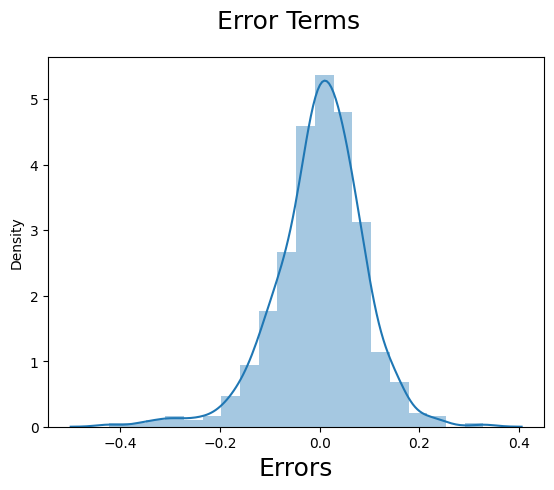

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

Conclusion: 
We can clearly see that the error terms are centred around 0 and follows a normal distribution,
this is in accordance with the stated assumptions of linear regression.

Validating homoscedasticity

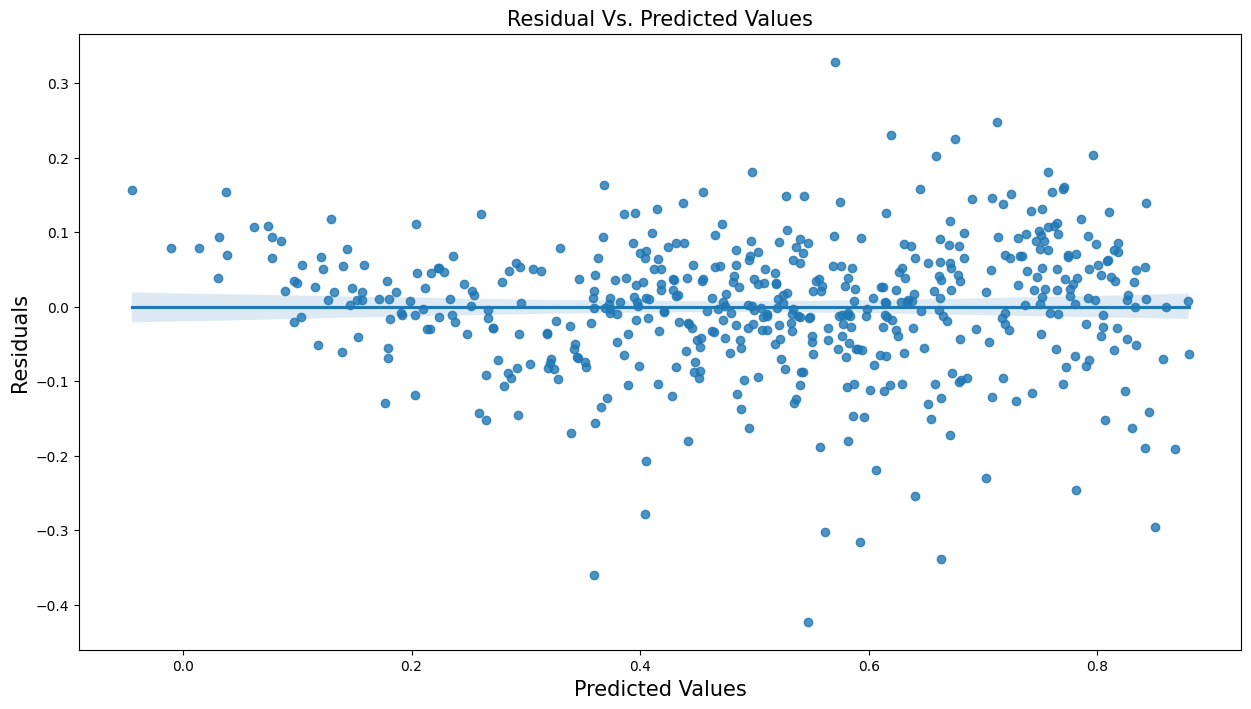

In [66]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
residual =Y_train - y_train_cnt
sns.regplot(x=y_train_cnt, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [67]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_cnt, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 5.2562121322097255e-16


######  From the above graph, we see that there is almost no relation between Residual & Predicted Value.

Validating Absence of Multicolinearity

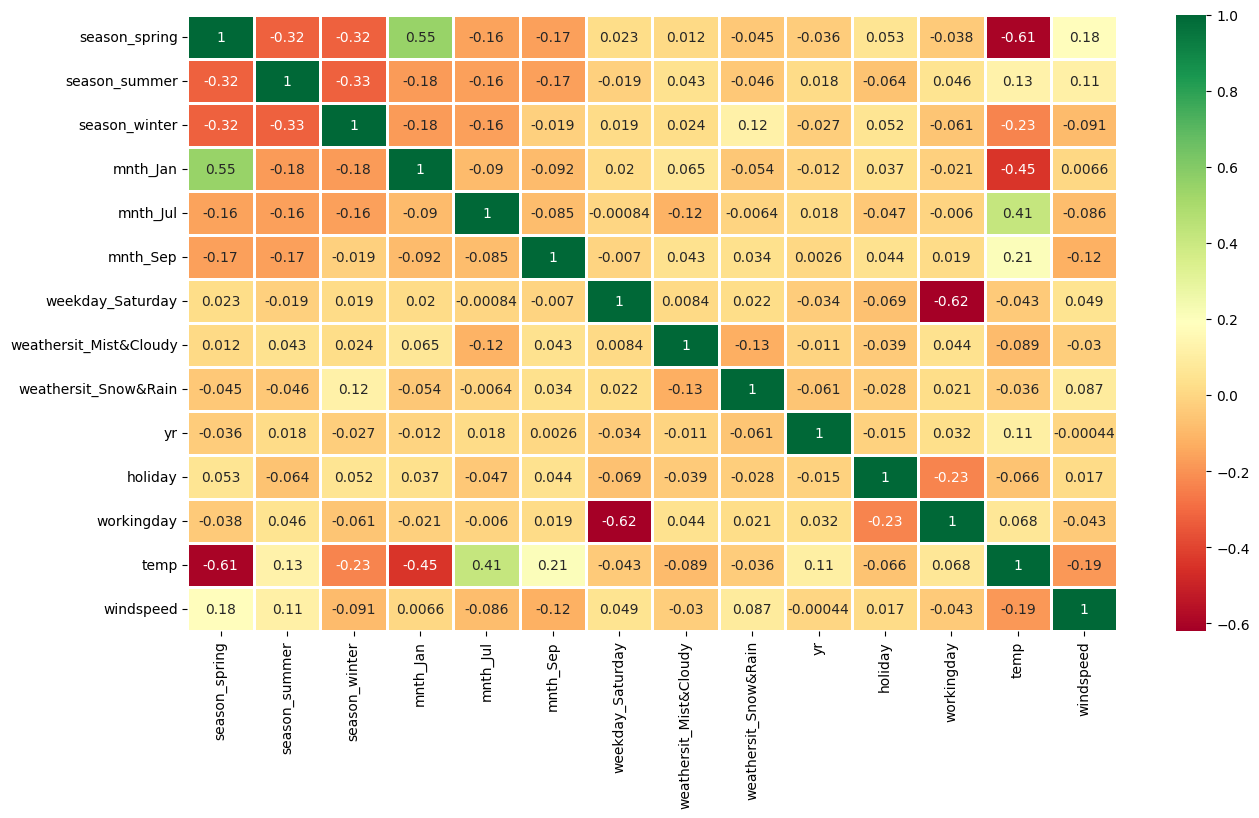

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

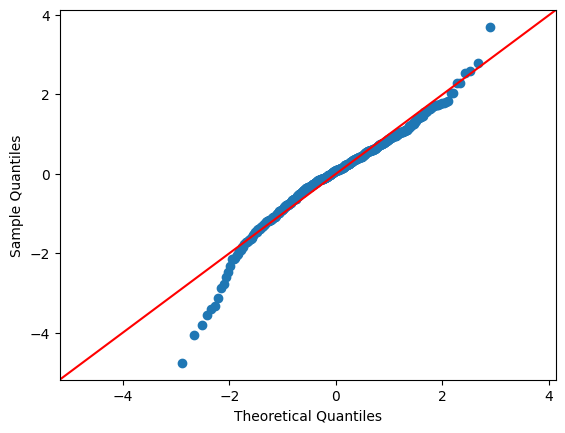

In [69]:
residuals = Y_train - y_train_cnt
sm.qqplot(residuals, fit=True, line='45')
plt.show()

In [70]:
r2 = r2_score(Y_train , y_train_cnt)
r2

0.8428227495513763

## Prediction and evaluation on the Test Datset

In [71]:
#create a numeric list as we want to scale only the numeric variable not the dummy variables created now
var_list =['temp','atemp','hum','windspeed','cnt']

In [72]:
bike_test[var_list]= scaler.fit_transform(bike_test[var_list])
bike_test.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148


In [73]:
bike_test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.318182,0.027273,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.466833,0.163248,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
###Dividing into X_test and y_test

y_test = bike_test.pop('cnt')
X_test = bike_test

In [75]:
#Selecting the variables that were part of final model.
test_col = X_train_lm.columns

In [76]:
X_test_new =X_test[test_col[1:]]
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   220 non-null    float64
 1   season_spring           220 non-null    uint8  
 2   season_summer           220 non-null    uint8  
 3   season_winter           220 non-null    uint8  
 4   mnth_Jan                220 non-null    uint8  
 5   mnth_Jul                220 non-null    uint8  
 6   mnth_Sep                220 non-null    uint8  
 7   weekday_Saturday        220 non-null    uint8  
 8   weathersit_Mist&Cloudy  220 non-null    uint8  
 9   weathersit_Snow&Rain    220 non-null    uint8  
 10  yr                      220 non-null    int64  
 11  holiday                 220 non-null    int64  
 12  workingday              220 non-null    int64  
 13  temp                    220 non-null    float64
 14  windspeed               220 non-null    

In [77]:
X_test_new.head()

,const,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Mist&Cloudy,weathersit_Snow&Rain,yr,holiday,workingday,temp,windspeed
184,1.0,0,0,0,0,1,0,0,1,0,0,1,0,0.837241,0.149393
535,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.911423,0.231142
299,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0.496221,0.443398
221,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.890387,0.449707
152,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0.821739,0.682387


# Making Prediction 

In [78]:
y_pred = lm_new.predict(X_test_new)

#### Model Evalution

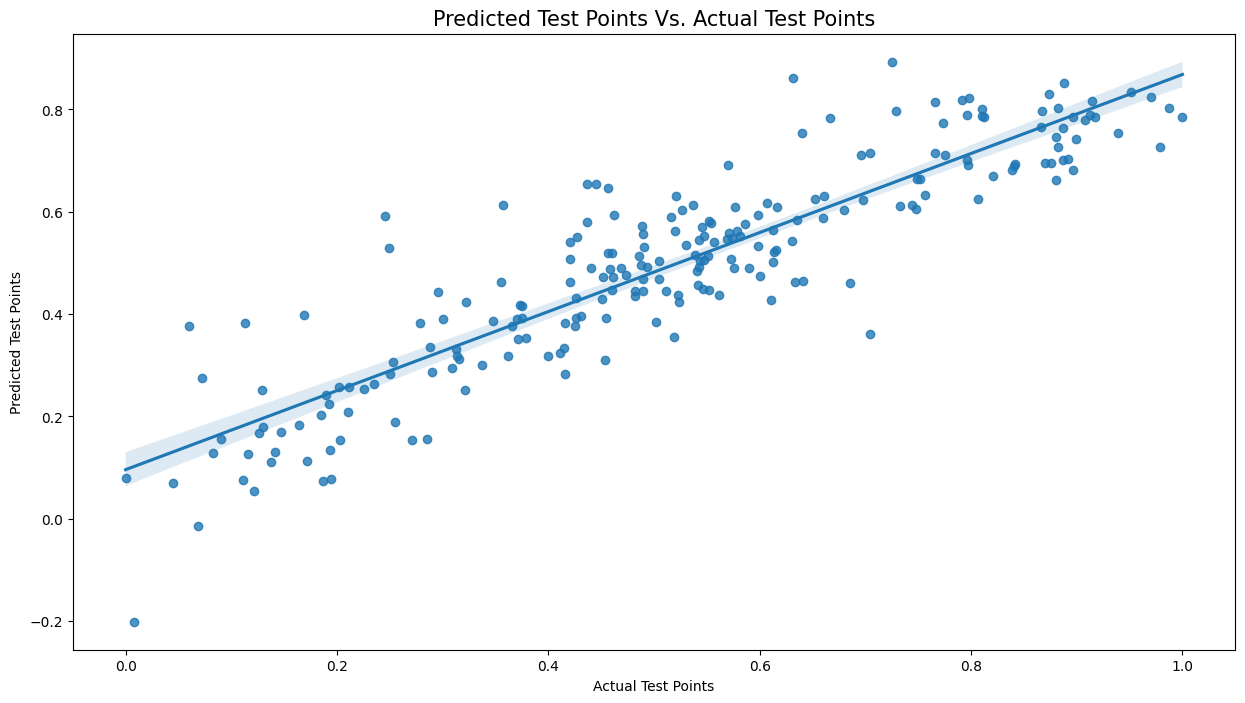

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 10})
plt.show()

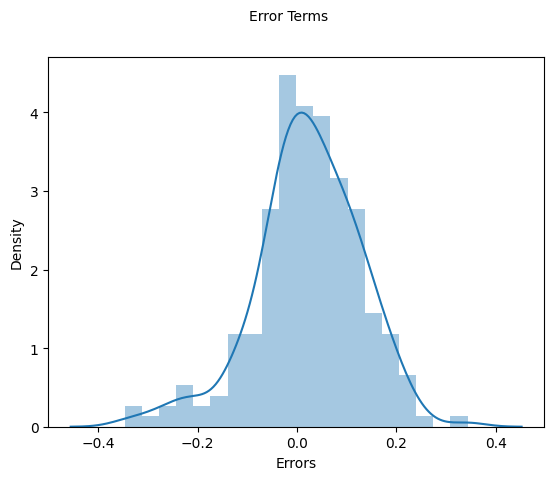

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                 
plt.xlabel('Errors', fontsize = 10)   
plt.show()

### Generating R-Square

In [81]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7934258955716678

In [ ]:
Generating the Adjusted R2

In [82]:
X_test_new.shape

(220, 15)

In [83]:
n=X_test_new.shape[0]
n

220

In [84]:
p=X_test_new.shape[1]
p

15

In [85]:
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7782366231872315

In [86]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0118


In [87]:
lm_new.params

const                     0.173669
season_spring            -0.059888
season_summer             0.044507
season_winter             0.078366
mnth_Jan                 -0.039197
mnth_Jul                 -0.047871
mnth_Sep                  0.075470
weekday_Saturday          0.058305
weathersit_Mist&Cloudy   -0.081261
weathersit_Snow&Rain     -0.290800
yr                        0.234461
holiday                  -0.055784
workingday                0.046359
temp                      0.472207
windspeed                -0.156254
dtype: float64

# Conculsion :

We conclude that tha model build-lm_new is good with the parameters we have used 

R2 Square for the Test Set is 0.793 and train set was 0.84, So the demand for the bike is approx > 80%

R2 Square for the Test Set is 0.793 and train set was 0.84
From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well 
explain more than 79% of bike demand.
Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.472207)

mnth_Sep (0.075470)

year (0.234461)

Hence, it can be clearly concluded that the variables temperature , Year and September month are significant in predicting the demand for shared bikes

For the below variables we see 

Holiday : We see the increase in the variable , the demand for bike reduces

Windspeed - Unit increase in this variables decreases the Bike demand 

Weathersit of LightRain and Snow The coeffiecent value of -0.290800  indicated that the light snow and rain deters people from renting out bikes

### Final Conclusions : 
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

cnt = 0.173669+season_spring(-0.059888)+season_summer*(0.044507)+season_winter (0.078366)+mnth_Jan(-0.039197)
+mnth_Jul(-0.047871)+mnth_Sep(0.075470) +weekday_Saturday(0.058305)+weathersit_Mist&Cloudy(-0.081261)
weathersit_Snow&Rain(-0.290800)+yr*(0.234461)+holiday(-0.055784)+workingday*(0.046359)+temp(0.472207)+windspeed(-0.156254)

## Recommendation to the company
The months - Jan , Jul , Sep  should be considered by the company as they have a higher demand as compared to other months.
With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
During the Winter season also we the some positive demand, hence it should be well prepared to meet the high demand.

It is recommended to give utmost importance to these three variables(Yr, Month and temp) while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.